# Exploratory Data Analysis For Covid 19 Pandemic in Malaysia (latest 06-09-2021)

## Covid 19 cases

In [194]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns
import datetime
import json
import plotly.express as px
import plotly.graph_objects as go
import re
import io
from wordcloud import WordCloud, STOPWORDS
from PIL import Image
# import plotly.io as pio
# pio.renderers.default = 'browser'
# import geopandas as gpd

%matplotlib inline
pd.set_option('display.max_rows', 500)  #To avoid narrowing dataset when dataset is large
pd.set_option('display.max_columns', 500)

In [2]:
data_Covid_Malaysia_Url = 'https://raw.githubusercontent.com/MoH-Malaysia/covid19-public/main/epidemic/cases_malaysia.csv'
data_Covid_Malaysia_State_Url = 'https://raw.githubusercontent.com/MoH-Malaysia/covid19-public/main/epidemic/cases_state.csv'
data_Covid_Population_Url = 'https://raw.githubusercontent.com/MoH-Malaysia/covid19-public/main/static/population.csv'

data_Covid_Malaysia = pd.read_csv(data_Covid_Malaysia_Url)
data_Covid_Malaysia_State = pd.read_csv(data_Covid_Malaysia_State_Url)
data_Population_Malaysia = pd.read_csv(data_Covid_Population_Url)

#the first entry, date 2020-03-16, its' data are cumulated from previous dates, so need to drop it
data_Covid_Malaysia.drop(index=data_Covid_Malaysia.index[:1], axis=0, inplace=True) 

#the first 16 entries, date 2020-03-16, its' data are cumulated from previous dates, so need to drop it
data_Covid_Malaysia_State.drop(index=data_Covid_Malaysia_State.index[:16], axis=0, inplace=True)
data_Covid_Malaysia_State.reset_index(drop=True, inplace=True)  #because we need to set the index started from 0 due to previous drop operation
data_Covid_Malaysia_State_Without_Date = data_Covid_Malaysia_State.drop(columns=['date'])  #date is unused for this dataset

In [3]:
data_Covid_Malaysia.head()  #show first 5 rows of the dataset

date  cases_new  cases_import  cases_recovered  cluster_import  \
1  2020-01-26          0             0                0             NaN   
2  2020-01-27          0             0                0             NaN   
3  2020-01-28          0             0                0             NaN   
4  2020-01-29          3             3                0             NaN   
5  2020-01-30          1             1                0             NaN   

   cluster_religious  cluster_community  cluster_highRisk  cluster_education  \
1                NaN                NaN               NaN                NaN   
2                NaN                NaN               NaN                NaN   
3                NaN                NaN               NaN                NaN   
4                NaN                NaN               NaN                NaN   
5                NaN                NaN               NaN                NaN   

   cluster_detentionCentre  cluster_workplace  
1                      NaN                NaN  
2                      NaN                NaN  
3                      NaN                NaN  
4                      NaN                NaN  
5                      NaN                NaN

In [4]:
data_Covid_Malaysia_State.head()  #show first 5 rows of the dataset

date            state  cases_new  cases_import  cases_recovered
0  2020-01-26            Johor          0             0              0.0
1  2020-01-26            Kedah          0             0              0.0
2  2020-01-26         Kelantan          0             0              0.0
3  2020-01-26           Melaka          0             0              0.0
4  2020-01-26  Negeri Sembilan          0             0              0.0

In [5]:
data_Covid_Malaysia.shape  

(589, 11)

In [6]:
data_Covid_Malaysia_State.shape

(9424, 5)

In [7]:
data_Covid_Malaysia.dtypes

date                        object
cases_new                    int64
cases_import                 int64
cases_recovered              int64
cluster_import             float64
cluster_religious          float64
cluster_community          float64
cluster_highRisk           float64
cluster_education          float64
cluster_detentionCentre    float64
cluster_workplace          float64
dtype: object

In [8]:
data_Covid_Malaysia_State.dtypes

date                object
state               object
cases_new            int64
cases_import         int64
cases_recovered    float64
dtype: object

In [9]:
data_Covid_Malaysia.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 589 entries, 1 to 589
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   date                     589 non-null    object 
 1   cases_new                589 non-null    int64  
 2   cases_import             589 non-null    int64  
 3   cases_recovered          589 non-null    int64  
 4   cluster_import           248 non-null    float64
 5   cluster_religious        248 non-null    float64
 6   cluster_community        248 non-null    float64
 7   cluster_highRisk         248 non-null    float64
 8   cluster_education        248 non-null    float64
 9   cluster_detentionCentre  248 non-null    float64
 10  cluster_workplace        248 non-null    float64
dtypes: float64(7), int64(3), object(1)
memory usage: 55.2+ KB


In [10]:
data_Covid_Malaysia_State.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9424 entries, 0 to 9423
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   date             9424 non-null   object 
 1   state            9424 non-null   object 
 2   cases_new        9424 non-null   int64  
 3   cases_import     9424 non-null   int64  
 4   cases_recovered  9280 non-null   float64
dtypes: float64(1), int64(2), object(2)
memory usage: 368.2+ KB


In [11]:
data_Covid_Malaysia.describe()  #only numeric columns are shown

cases_new  cases_import  cases_recovered  cluster_import  \
count    589.000000    589.000000       589.000000      248.000000   
mean    3132.140917      7.772496      2666.468591        0.431452   
std     5362.599307      8.824008      4647.365307        3.721496   
min        0.000000      0.000000         0.000000        0.000000   
25%       31.000000      2.000000        27.000000        0.000000   
50%     1032.000000      5.000000       883.000000        0.000000   
75%     3384.000000     10.000000      3320.000000        0.000000   
max    24599.000000     72.000000     23473.000000       54.000000   

       cluster_religious  cluster_community  cluster_highRisk  \
count         248.000000         248.000000        248.000000   
mean           32.657258         240.133065         29.540323   
std            66.381363         192.241399         33.746351   
min             0.000000          19.000000          0.000000   
25%             1.000000          90.500000          4.000000   
50%             7.000000         179.000000         16.000000   
75%            24.250000         352.250000         45.250000   
max           359.000000         825.000000        189.000000   

       cluster_education  cluster_detentionCentre  cluster_workplace  
count         248.000000               248.000000         248.000000  
mean           41.044355                84.782258         804.262097  
std            76.786536                81.454695         476.636724  
min             0.000000                 0.000000          57.000000  
25%             0.000000                28.500000         364.250000  
50%            12.500000                64.000000         809.000000  
75%            36.500000               110.250000        1165.000000  
max           501.000000               439.000000        2338.000000

In [12]:
data_Covid_Malaysia_State.describe()  #only numeric columns are shown

cases_new  cases_import  cases_recovered
count  9424.000000   9424.000000      9280.000000
mean    195.758807      0.485781       148.599784
std     603.327842      2.193352       495.837830
min       0.000000      0.000000         0.000000
25%       0.000000      0.000000         0.000000
50%       7.000000      0.000000         4.000000
75%     124.000000      0.000000        90.250000
max    8792.000000     72.000000      8803.000000

In [13]:
print(data_Population_Malaysia.shape)

print(data_Population_Malaysia.info())

print(data_Population_Malaysia.describe())

data_Population_Malaysia.set_index('state', inplace=True)

(17, 5)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17 entries, 0 to 16
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   state   17 non-null     object
 1   idxs    17 non-null     int64 
 2   pop     17 non-null     int64 
 3   pop_18  17 non-null     int64 
 4   pop_60  17 non-null     int64 
dtypes: int64(4), object(1)
memory usage: 808.0+ bytes
None
            idxs           pop        pop_18        pop_60
count  17.000000  1.700000e+01  1.700000e+01  1.700000e+01
mean    8.000000  3.842047e+06  2.754071e+06  4.120000e+05
std     5.049752  7.597089e+06  5.448646e+06  8.107364e+05
min     0.000000  9.960000e+04  6.770000e+04  5.000000e+03
25%     4.000000  1.128800e+06  8.084000e+05  1.185000e+05
50%     8.000000  1.773700e+06  1.348600e+06  2.058000e+05
75%    12.000000  2.816500e+06  2.042700e+06  3.328000e+05
max    16.000000  3.265740e+07  2.340960e+07  3.502000e+06


In [14]:
data_Covid_Malaysia_Cases = data_Covid_Malaysia[['date', 'cases_new']]  
data_Covid_Malaysia_Cases.head()

date  cases_new
1  2020-01-26          0
2  2020-01-27          0
3  2020-01-28          0
4  2020-01-29          3
5  2020-01-30          1

In [15]:
month = data_Covid_Malaysia_Cases['date'].map(lambda x: x.split('-')[1])
year = data_Covid_Malaysia_Cases['date'].map(lambda x: x.split('-')[0])

NumToMonth = {     #library that map month number to month name
    '01': 'Jan',
    '02': 'Feb',
    '03': 'Mar',
    '04': 'Apr',
    '05': 'May',
    '06': 'Jun',
    '07': 'July',
    '08': 'Aug',
    '09': 'Sep',
    '10': 'Oct',
    '11': 'Nov',
    '12': 'Dec'
}

data_Covid_Malaysia_Cases_byMonth_and_Year = data_Covid_Malaysia_Cases.groupby(by=[year, month]).sum() #we group by year first, then only month

data_Covid_Malaysia_Cases_byMonth_and_Year.index.set_names(['year', 'month'], inplace=True)
data_Covid_Malaysia_Cases_byMonth_and_Year.rename(columns={'cases_new':'total_cases_per_month'}, inplace=True)

data_Covid_Malaysia_Cases_byMonth_and_Year.reset_index(inplace=True)  #to clear mutilple indexs 'year' and 'month'

for x in data_Covid_Malaysia_Cases_byMonth_and_Year.index:
    for key, value in NumToMonth.items():
        if data_Covid_Malaysia_Cases_byMonth_and_Year['month'][x] in key:
            data_Covid_Malaysia_Cases_byMonth_and_Year.loc[x,'month'] = value   #this is when converting month number to month name
            
data_Covid_Malaysia_Cases_byMonth_and_Year['year_month'] = data_Covid_Malaysia_Cases_byMonth_and_Year['year'] + ' ' + data_Covid_Malaysia_Cases_byMonth_and_Year['month']

#drop last row because right now we want to get the total cases for each month, we will get incorrect insights if we do not drop last row since last row does not contain full month data.
data_Covid_Malaysia_Cases_byMonth_and_Year.drop(data_Covid_Malaysia_Cases_byMonth_and_Year.tail(1).index,inplace=True) # drop last rows

data_Covid_Malaysia_Cases_byMonth_and_Year

year month  total_cases_per_month year_month
0   2020   Jan                      4   2020 Jan
1   2020   Feb                     21   2020 Feb
2   2020   Mar                   2737   2020 Mar
3   2020   Apr                   3236   2020 Apr
4   2020   May                   1817   2020 May
5   2020   Jun                    811   2020 Jun
6   2020  July                    346  2020 July
7   2020   Aug                    364   2020 Aug
8   2020   Sep                   1884   2020 Sep
9   2020   Oct                  20324   2020 Oct
10  2020   Nov                  34149   2020 Nov
11  2020   Dec                  47313   2020 Dec
12  2021   Jan                 101949   2021 Jan
13  2021   Feb                  85793   2021 Feb
14  2021   Mar                  44748   2021 Mar
15  2021   Apr                  63213   2021 Apr
16  2021   May                 163644   2021 May
17  2021   Jun                 179622   2021 Jun
18  2021  July                 361293  2021 July
19  2021   Aug                 632982   2021 Aug

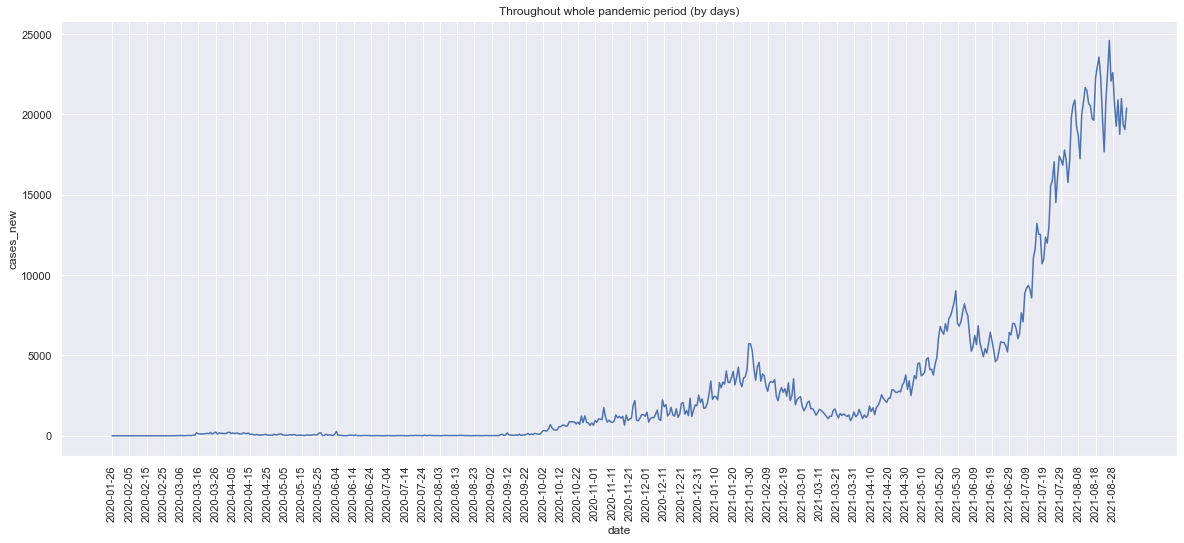

In [16]:
plt.figure(figsize=(20,8))
sns.set_theme(style="darkgrid") #to make the background more pleasing and easy to be visualized
sns.lineplot(x='date', y='cases_new', data=data_Covid_Malaysia)
plt.xticks(np.arange(0, len(data_Covid_Malaysia), step=10), rotation=90)     
plt.title('Throughout whole pandemic period (by days)')
plt.show()

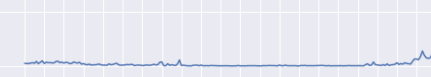

from this image we can see that there are not much different throughout first few months, so we better use log scale method to see the details for said periods. 

Now let's see if we change from linear scale to log scale (base 10) 

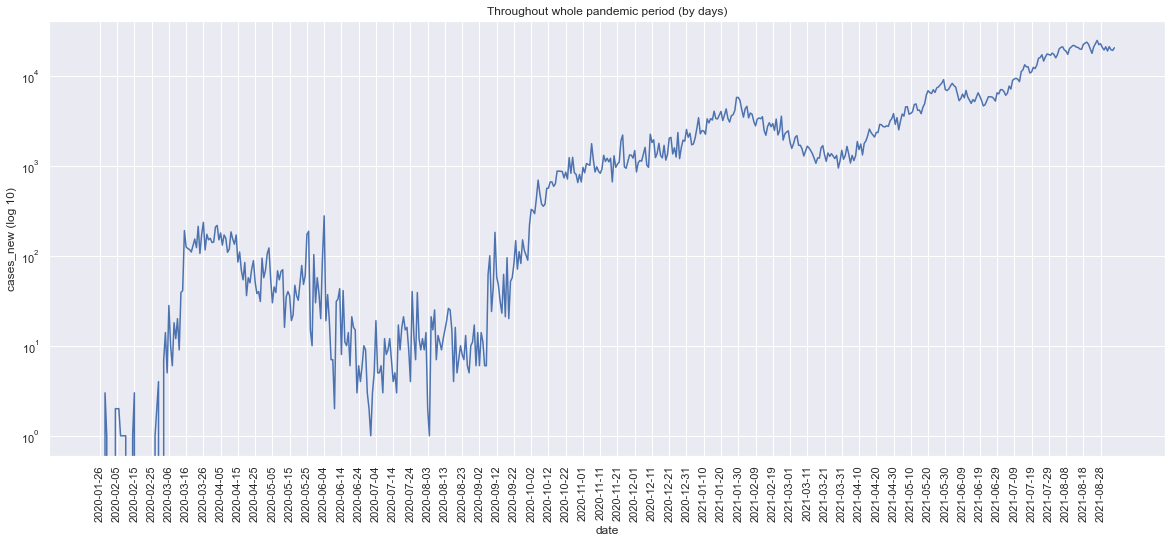

In [17]:
plt.figure(figsize=(20,8))
sns.set_theme(style="darkgrid") #to make the background more pleasing and easy to be visualized
sns.lineplot(x='date', y='cases_new', data=data_Covid_Malaysia)
plt.yscale('log', base=10) 
plt.xticks(np.arange(0, len(data_Covid_Malaysia), step=10), rotation=90)     
plt.title('Throughout whole pandemic period (by days)')
plt.ylabel("cases_new (log 10)")
plt.show()

so now we can see the details cleary for the first few months

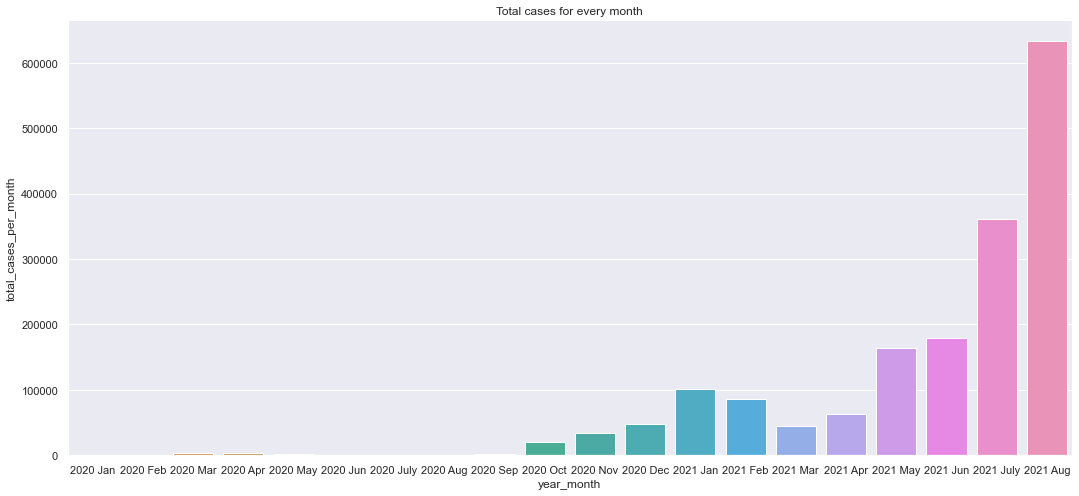

In [18]:
plt.figure(figsize=(18,8))
sns.barplot(x="year_month", y="total_cases_per_month", data=data_Covid_Malaysia_Cases_byMonth_and_Year)
plt.xticks(rotation=0)     
plt.title('Total cases for every month')
plt.show()

In [19]:
data_Covid_Malaysia_State_total = data_Covid_Malaysia_State_Without_Date.groupby(by='state').sum().sort_values('cases_new', ascending=False)

data_Covid_Malaysia_State_total.rename(columns={'cases_new':'total_cases_per_state'}, inplace=True)
data_Covid_Malaysia_State_total

total_cases_per_state  cases_import  cases_recovered
state                                                                  
Selangor                          623053          1234         503068.0
W.P. Kuala Lumpur                 176591          1946         141673.0
Sabah                             159421            64         105292.0
Johor                             149354           396         106772.0
Sarawak                           130898           238          86682.0
Kedah                             107468            21          71559.0
Pulau Pinang                       95098            49          51057.0
Negeri Sembilan                    92849           269          83238.0
Kelantan                           84145            23          58668.0
Perak                              73878             7          19527.0
Melaka                             50470            96          38024.0
Pahang                             46902            41          32522.0
Terengganu                         36983            42          25788.0
W.P. Labuan                         9834            65           9618.0
W.P. Putrajaya                      5553            47           4352.0
Perlis                              2334            40          41166.0

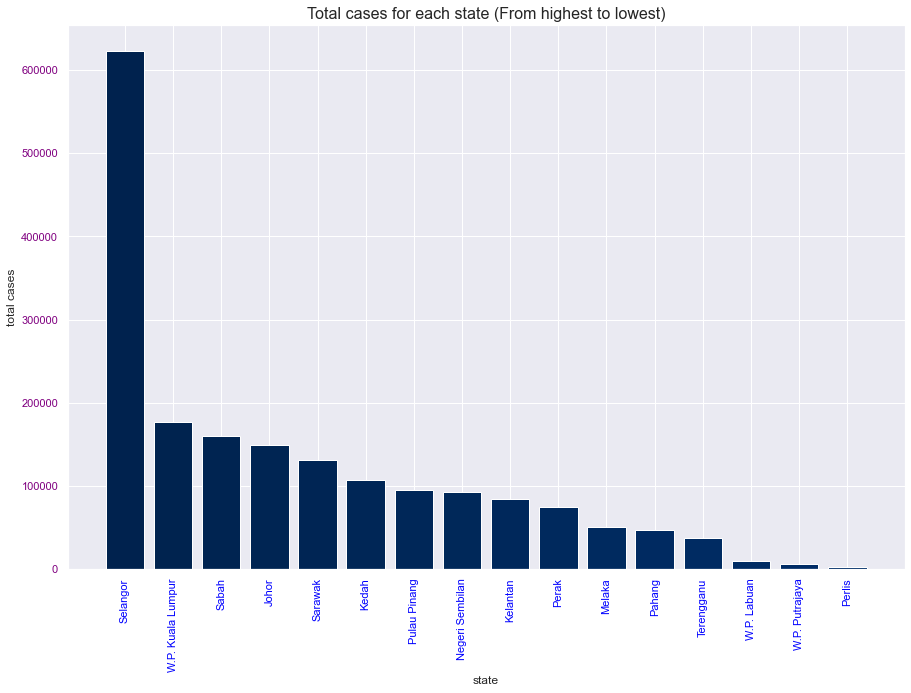

In [20]:
fig, ax = plt.subplots(figsize=(15,10))
my_cmap = plt.get_cmap("cividis")
ax.bar(x=data_Covid_Malaysia_State_total.index, height=data_Covid_Malaysia_State_total['total_cases_per_state'], color=my_cmap.colors)
ax.set_title('Total cases for each state (From highest to lowest)', fontsize=16)
ax.set_xticks(ax.get_xticks())
ax.set_xticklabels(data_Covid_Malaysia_State_total.index, rotation=90)
ax.tick_params(axis='x', colors='blue')
ax.tick_params(axis='y', colors='purple')
ax.set_xlabel('state')
ax.set_ylabel('total cases')
plt.show()

In [21]:
data_Covid_Malaysia_Cases_Pop = data_Covid_Malaysia_State_total.merge(data_Population_Malaysia['pop'], copy=False, how='inner', on='state')   
#now we join 2 dataset together based on 'state' column

data_Covid_Malaysia_Cases_Pop

total_cases_per_state  cases_import  cases_recovered  \
state                                                                     
Selangor                          623053          1234         503068.0   
W.P. Kuala Lumpur                 176591          1946         141673.0   
Sabah                             159421            64         105292.0   
Johor                             149354           396         106772.0   
Sarawak                           130898           238          86682.0   
Kedah                             107468            21          71559.0   
Pulau Pinang                       95098            49          51057.0   
Negeri Sembilan                    92849           269          83238.0   
Kelantan                           84145            23          58668.0   
Perak                              73878             7          19527.0   
Melaka                             50470            96          38024.0   
Pahang                             46902            41          32522.0   
Terengganu                         36983            42          25788.0   
W.P. Labuan                         9834            65           9618.0   
W.P. Putrajaya                      5553            47           4352.0   
Perlis                              2334            40          41166.0   

                       pop  
state                       
Selangor           6538000  
W.P. Kuala Lumpur  1773700  
Sabah              3908500  
Johor              3781000  
Sarawak            2816500  
Kedah              2185100  
Pulau Pinang       1773600  
Negeri Sembilan    1128800  
Kelantan           1906700  
Perak              2510300  
Melaka              932700  
Pahang             1678700  
Terengganu         1259300  
W.P. Labuan          99600  
W.P. Putrajaya      110000  
Perlis              254900

In [22]:
data_Covid_Malaysia_Cases_Pop['cases_population_percentage (%)'] = round(data_Covid_Malaysia_Cases_Pop['total_cases_per_state'] / data_Covid_Malaysia_Cases_Pop['pop'] * 100, 2)
data_Covid_Malaysia_Cases_Pop

total_cases_per_state  cases_import  cases_recovered  \
state                                                                     
Selangor                          623053          1234         503068.0   
W.P. Kuala Lumpur                 176591          1946         141673.0   
Sabah                             159421            64         105292.0   
Johor                             149354           396         106772.0   
Sarawak                           130898           238          86682.0   
Kedah                             107468            21          71559.0   
Pulau Pinang                       95098            49          51057.0   
Negeri Sembilan                    92849           269          83238.0   
Kelantan                           84145            23          58668.0   
Perak                              73878             7          19527.0   
Melaka                             50470            96          38024.0   
Pahang                             46902            41          32522.0   
Terengganu                         36983            42          25788.0   
W.P. Labuan                         9834            65           9618.0   
W.P. Putrajaya                      5553            47           4352.0   
Perlis                              2334            40          41166.0   

                       pop  cases_population_percentage (%)  
state                                                        
Selangor           6538000                             9.53  
W.P. Kuala Lumpur  1773700                             9.96  
Sabah              3908500                             4.08  
Johor              3781000                             3.95  
Sarawak            2816500                             4.65  
Kedah              2185100                             4.92  
Pulau Pinang       1773600                             5.36  
Negeri Sembilan    1128800                             8.23  
Kelantan           1906700                             4.41  
Perak              2510300                             2.94  
Melaka              932700                             5.41  
Pahang             1678700                             2.79  
Terengganu         1259300                             2.94  
W.P. Labuan          99600                             9.87  
W.P. Putrajaya      110000                             5.05  
Perlis              254900                             0.92

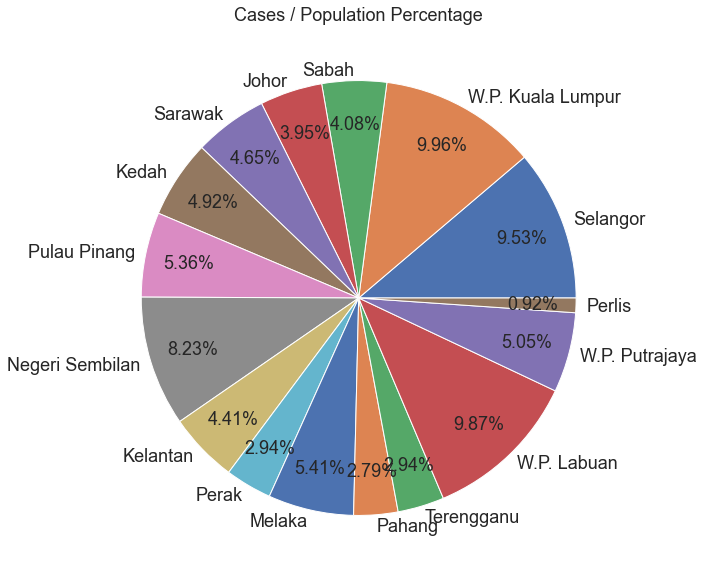

In [23]:
plt.figure(figsize=(10,10))
plt.rcParams['font.size'] = 18.0
patches, texts, autotexts = plt.pie(data_Covid_Malaysia_Cases_Pop['cases_population_percentage (%)'], 
                                    labels = data_Covid_Malaysia_Cases_Pop.index, 
                                    autopct=lambda x: '{:.2f}%'.format(x*data_Covid_Malaysia_Cases_Pop['cases_population_percentage (%)'].sum()/100), 
                                    pctdistance=0.8, 
                                    labeldistance=1.05
                                    )
[ text.set_fontsize(18) for text in texts ]  #list comprehension, set every label font to desired size
plt.title('Cases / Population Percentage', fontsize = 18)
plt.show()

In [24]:
data_Covid_Malaysia_Cases_Pop_Sorted = data_Covid_Malaysia_Cases_Pop.sort_values('cases_population_percentage (%)', ascending=False)
data_Covid_Malaysia_Cases_Pop_Sorted.head(5)

total_cases_per_state  cases_import  cases_recovered  \
state                                                                     
W.P. Kuala Lumpur                 176591          1946         141673.0   
W.P. Labuan                         9834            65           9618.0   
Selangor                          623053          1234         503068.0   
Negeri Sembilan                    92849           269          83238.0   
Melaka                             50470            96          38024.0   

                       pop  cases_population_percentage (%)  
state                                                        
W.P. Kuala Lumpur  1773700                             9.96  
W.P. Labuan          99600                             9.87  
Selangor           6538000                             9.53  
Negeri Sembilan    1128800                             8.23  
Melaka              932700                             5.41

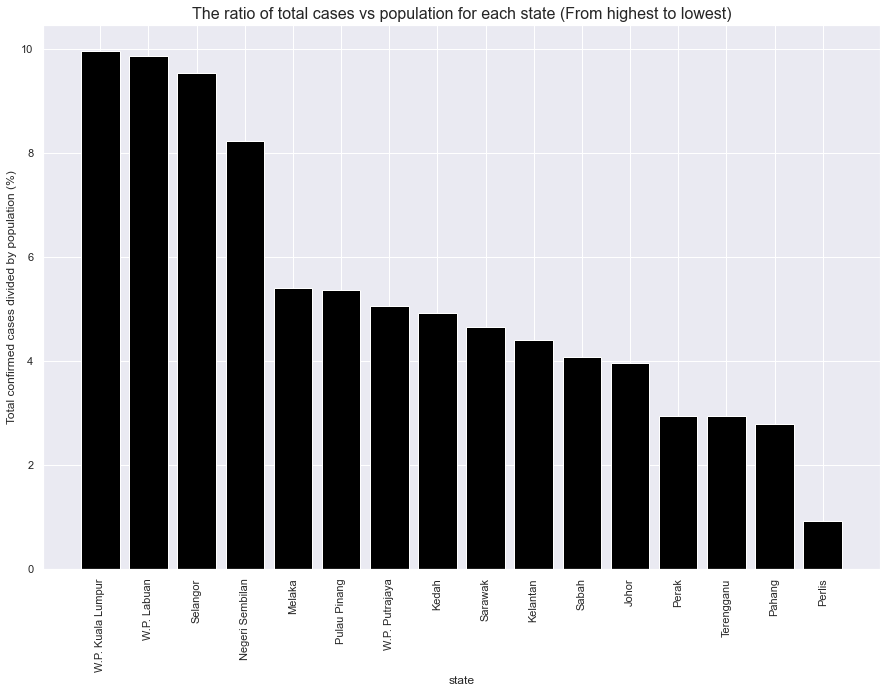

In [25]:
fig, ax = plt.subplots(figsize=(15,10))
ax.bar(x=data_Covid_Malaysia_Cases_Pop_Sorted.index, height=data_Covid_Malaysia_Cases_Pop_Sorted['cases_population_percentage (%)'], color='black')
ax.set_title('The ratio of total cases vs population for each state (From highest to lowest)', fontsize=16)
ax.set_xticks(ax.get_xticks())
ax.set_xlabel("state")
ax.set_ylabel("Total confirmed cases divided by population (%)")
ax.set_xticklabels(data_Covid_Malaysia_Cases_Pop_Sorted.index, rotation=90)
plt.show()

#### To show the severity of Covid-19 cases in Malaysia

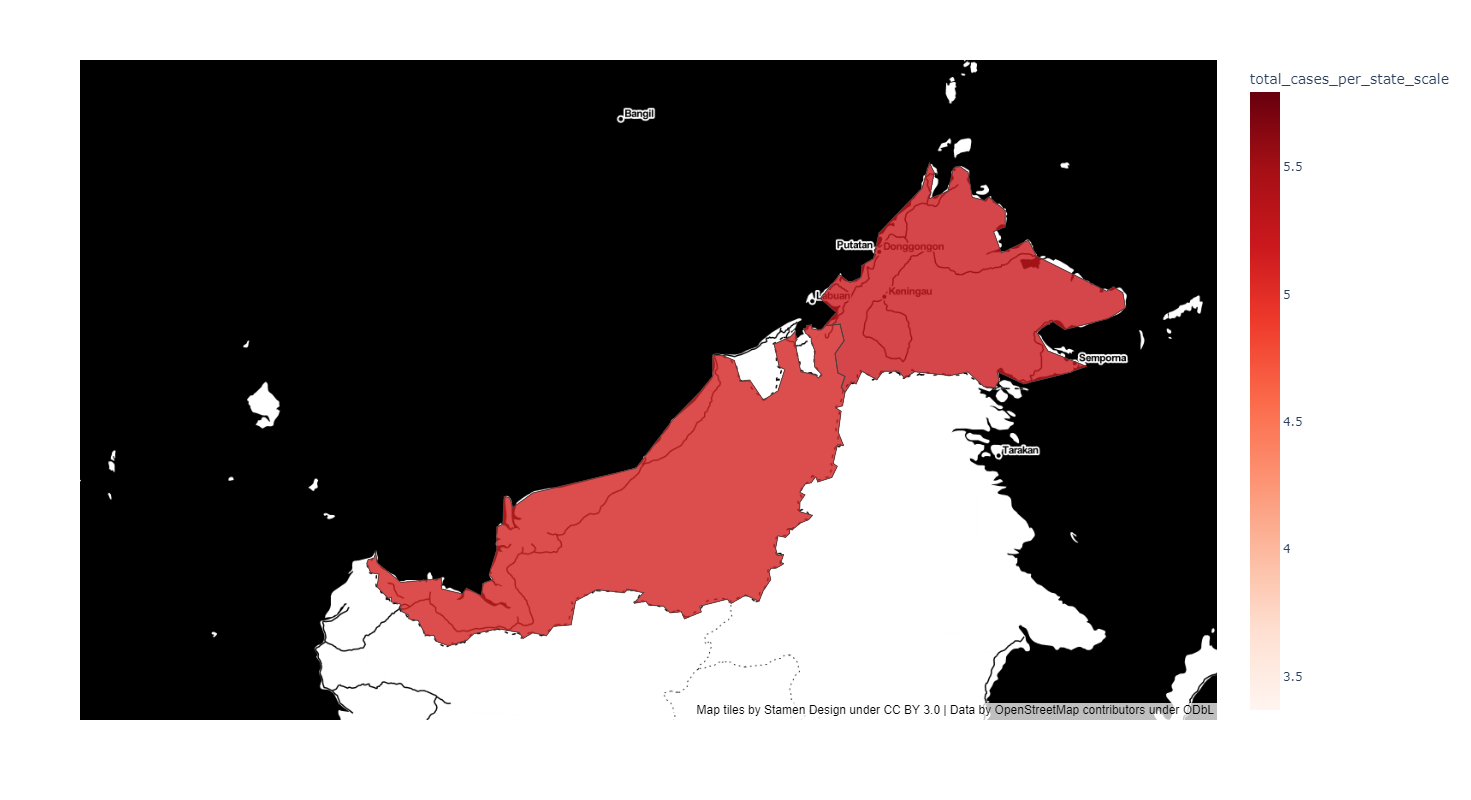

In [26]:
malaysia_states = json.load(open('malaysia.geojson', 'r'))

# data_Covid_Malaysia_Cases_Pop['id'] = range(1, 1+len(data_Covid_Malaysia_Cases_Pop))

state_id_geojson = {}  #declare dictionary
for feature in malaysia_states['features']:
    feature['id'] = feature['properties']['cartodb_id']
    state_id_geojson[feature['properties']['name']] = feature['id']

# W.P. Labuan does not have its coordinates currently
data_Covid_Malaysia_Cases_Pop_reset_index = data_Covid_Malaysia_Cases_Pop[data_Covid_Malaysia_Cases_Pop.index != 'W.P. Labuan'].reset_index() 

# match the name between geojson and dataset, so we change the keys in dict
state_id_geojson['W.P. Kuala Lumpur'] = state_id_geojson.pop('Federal Territory of Kuala Lumpur')
state_id_geojson['Pulau Pinang'] = state_id_geojson.pop('Penang')
state_id_geojson['W.P. Putrajaya'] = state_id_geojson.pop('Federal Territory of Putrajaya')

data_Covid_Malaysia_Cases_Pop_reset_index['id'] = data_Covid_Malaysia_Cases_Pop_reset_index['state'].apply(lambda x: state_id_geojson[x])
data_Covid_Malaysia_Cases_Pop_reset_index['total_cases_per_state_scale'] = np.log10(data_Covid_Malaysia_Cases_Pop_reset_index['total_cases_per_state']) # because the data are widely spread, we have to scale the data by logarithmic scale technique 

fig = px.choropleth_mapbox(data_Covid_Malaysia_Cases_Pop_reset_index, 
                    locations='id', 
                    geojson=malaysia_states, 
                    color='total_cases_per_state_scale', 
                    hover_name='state',
                    hover_data=['total_cases_per_state'],
                    mapbox_style='stamen-toner',
                    center={'lat': 5, 'lon': 109.5},
                    zoom=5,
                    color_continuous_scale=px.colors.sequential.Reds,
                    opacity=0.8)
fig.update_geos(fitbounds='locations', visible=False)
fig.update_layout(width=1200, height=800)
            
fig.show()

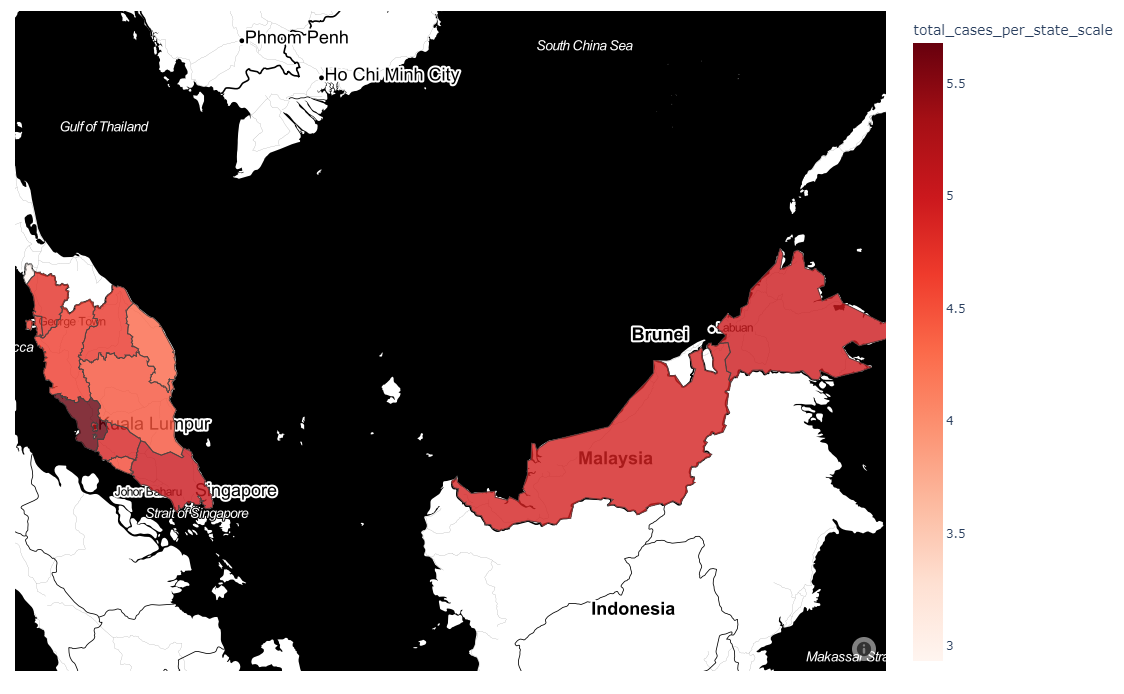

*note: the above map is rendered from my local jupyterlab, because this map cannot be rendered in github. you can clcik on 'external view availble with nbviewver' at the top right corner to see the map details.
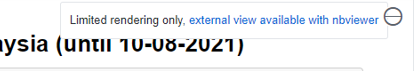 

the above map shows that the total covid-19 confirmed cases happened in each state. the saturity of each area represents the severity of circumstances. More saturated it is, then more number of cases.

## Vaccination Analysis

In [27]:
data_Vaccine_Malaysia_Url = 'https://raw.githubusercontent.com/CITF-Malaysia/citf-public/main/vaccination/vax_malaysia.csv'
data_Vaccine_State_Url = 'https://raw.githubusercontent.com/CITF-Malaysia/citf-public/main/vaccination/vax_state.csv'
data_Vaccine_Registration_Malaysia_Url = 'https://raw.githubusercontent.com/CITF-Malaysia/citf-public/main/registration/vaxreg_malaysia.csv'
data_Vaccine_Registration_State_Url = 'https://raw.githubusercontent.com/CITF-Malaysia/citf-public/main/registration/vaxreg_state.csv'

data_Vaccine_Malaysia = pd.read_csv(data_Vaccine_Malaysia_Url)
data_Vaccine_State = pd.read_csv(data_Vaccine_State_Url)
data_Vaccine_Registration_Malaysia = pd.read_csv(data_Vaccine_Registration_Malaysia_Url)
data_Vaccine_Registration_State = pd.read_csv(data_Vaccine_Registration_State_Url)

In [28]:
print(data_Vaccine_Malaysia.isna().sum())
print(data_Vaccine_State.isna().sum())
print(data_Vaccine_Registration_Malaysia.isna().sum())
print(data_Vaccine_Registration_State.isna().sum())

date             0
daily_partial    0
daily_full       0
daily            0
cumul_partial    0
cumul_full       0
cumul            0
pfizer1          0
pfizer2          0
sinovac1         0
sinovac2         0
astra1           0
astra2           0
cansino          0
pending          0
dtype: int64
date             0
state            0
daily_partial    0
daily_full       0
daily            0
cumul_partial    0
cumul_full       0
cumul            0
pfizer1          0
pfizer2          0
sinovac1         0
sinovac2         0
astra1           0
astra2           0
cansino          0
pending          0
dtype: int64
date        0
state       0
total       0
phase2      0
mysj        0
call        0
web         0
children    0
elderly     0
comorb      0
oku         0
dtype: int64
date        0
state       0
total       0
phase2      0
mysj        0
call        0
web         0
children    0
elderly     0
comorb      0
oku         0
dtype: int64


In [29]:
print(data_Vaccine_Malaysia.info())
print(data_Vaccine_State.info())
print(data_Vaccine_Registration_Malaysia.info())
print(data_Vaccine_Registration_State.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 194 entries, 0 to 193
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   date           194 non-null    object
 1   daily_partial  194 non-null    int64 
 2   daily_full     194 non-null    int64 
 3   daily          194 non-null    int64 
 4   cumul_partial  194 non-null    int64 
 5   cumul_full     194 non-null    int64 
 6   cumul          194 non-null    int64 
 7   pfizer1        194 non-null    int64 
 8   pfizer2        194 non-null    int64 
 9   sinovac1       194 non-null    int64 
 10  sinovac2       194 non-null    int64 
 11  astra1         194 non-null    int64 
 12  astra2         194 non-null    int64 
 13  cansino        194 non-null    int64 
 14  pending        194 non-null    int64 
dtypes: int64(14), object(1)
memory usage: 22.9+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3104 entries, 0 to 3103
Data columns (total 16 columns):


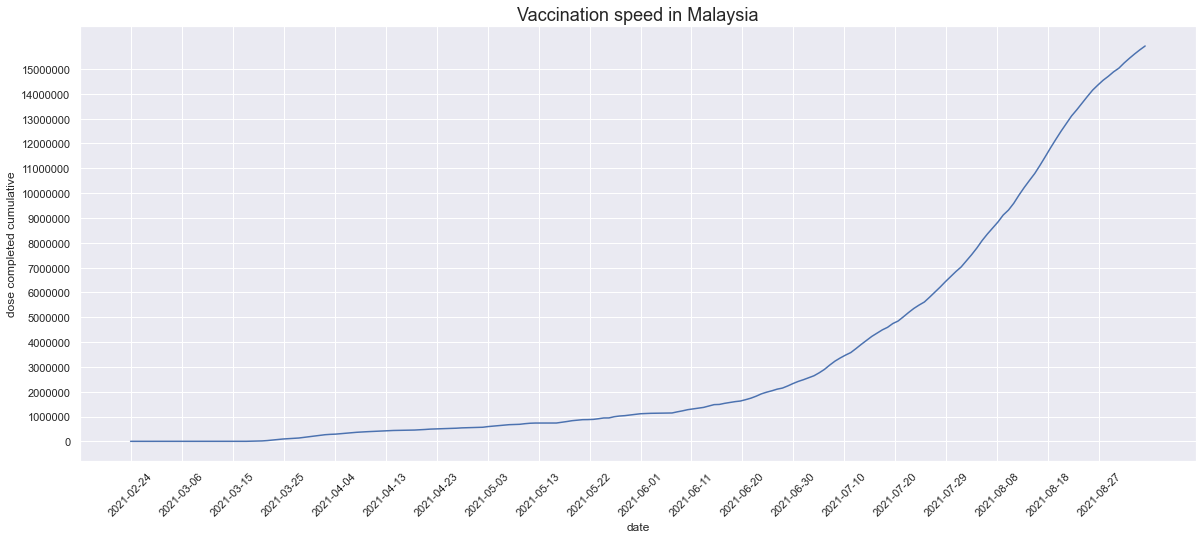

In [30]:
plt.figure(figsize=(20, 8))
sns.lineplot(data=data_Vaccine_Malaysia, x='date', y='cumul_full')  #we use dose2_cumul a.k.a second dose cumulative is because we want to know who are completed vaccinated
plt.xticks(np.arange(0, len(data_Vaccine_Malaysia), step=len(data_Vaccine_Malaysia) / 20), rotation=45)
plt.yticks(np.arange(0, max(data_Vaccine_Malaysia.cumul_full), step=1000000))
plt.ticklabel_format(axis='y', scilimits=(0, len(data_Vaccine_Malaysia.cumul_full)))  #this is set y scale from exponent value to actual value
plt.xlabel('date')
plt.ylabel('dose completed cumulative')
plt.title('Vaccination speed in Malaysia', fontsize=18)
plt.show()

          date              state  daily_partial  daily_full  daily  \
0   2021-09-05              Johor          32560       24524  57084   
1   2021-09-05              Kedah          16979        6732  23711   
2   2021-09-05           Kelantan          12544        8369  20913   
3   2021-09-05             Melaka           5659        2183   7842   
4   2021-09-05    Negeri Sembilan            812        3264   4076   
5   2021-09-05             Pahang          14673        2484  17157   
6   2021-09-05              Perak          18073        7079  25152   
7   2021-09-05             Perlis           1182        1186   2368   
8   2021-09-05       Pulau Pinang           7173       10862  18035   
9   2021-09-05              Sabah          11737       24549  36286   
10  2021-09-05            Sarawak            943        1422   2365   
11  2021-09-05           Selangor           5312       25947  31259   
12  2021-09-05         Terengganu           4226       16060  20286   
13  20

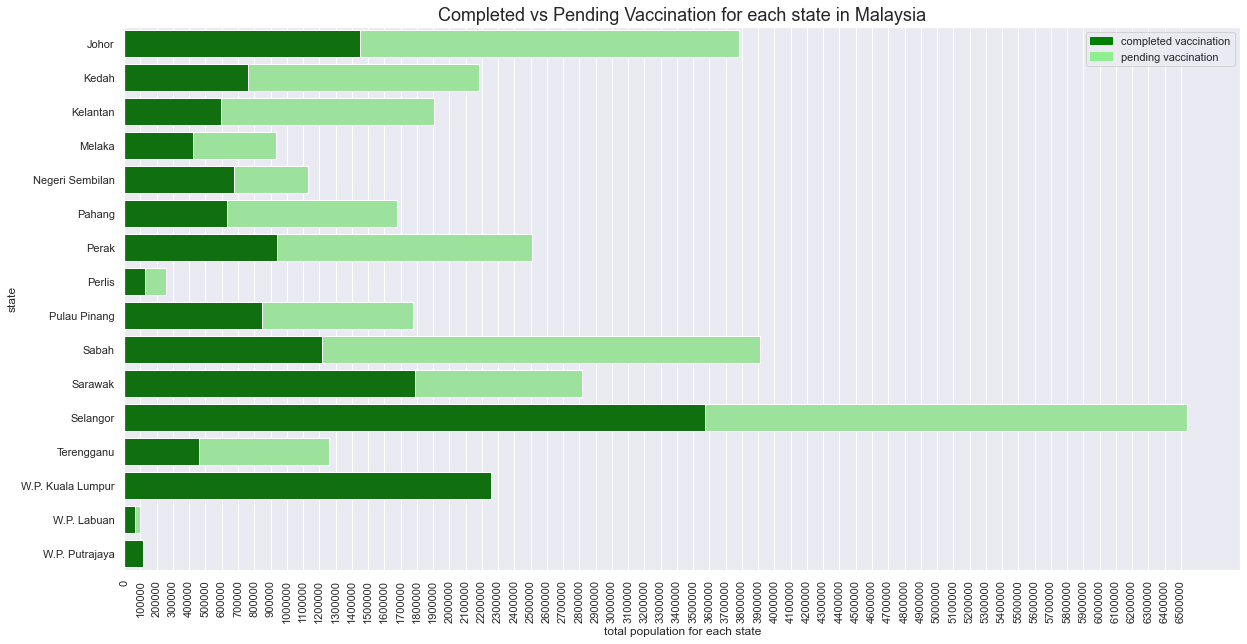

In [31]:
latest_date = data_Vaccine_State['date'].tail(1).values  #to get the latest date
data_Vaccine_State_Total = data_Vaccine_State[data_Vaccine_State.date == latest_date[0]]   #because latest_date will return array, latest_date[0] will return first string element 

data_Vaccine_State_Total_Pop = data_Vaccine_State_Total.merge(data_Covid_Malaysia_Cases_Pop['pop'], how='inner', on='state')

print(data_Vaccine_State_Total_Pop)

sns.set(style="darkgrid")
plt.figure(figsize=(20, 10))
# sns.set_palette("Greens_r", n_colors=len(data_Vaccine_State_Total))
sns.barplot(data=data_Vaccine_State_Total_Pop, x='pop', y='state', color='lightgreen')
sns.barplot(data=data_Vaccine_State_Total_Pop, x='cumul_full', y='state', color='green', estimator=sum)   #we use dose2_cumul a.k.a second dose cumulative is because we want to know who are completed vaccinated

#create legend
left_bar = mpatches.Patch(color='green', label='completed vaccination')
right_bar = mpatches.Patch(color='lightgreen', label='pending vaccination')
plt.legend(handles=[left_bar, right_bar])

plt.xticks(rotation=90)
plt.xticks(np.arange(0, max(data_Vaccine_State_Total_Pop['pop']), step=100000))
plt.ticklabel_format(axis='x', scilimits=(0, len(data_Vaccine_State_Total_Pop['pop'])))
plt.xlabel('total population for each state')
plt.ylabel('state')
plt.title('Completed vs Pending Vaccination for each state in Malaysia', fontsize=18)
plt.show()

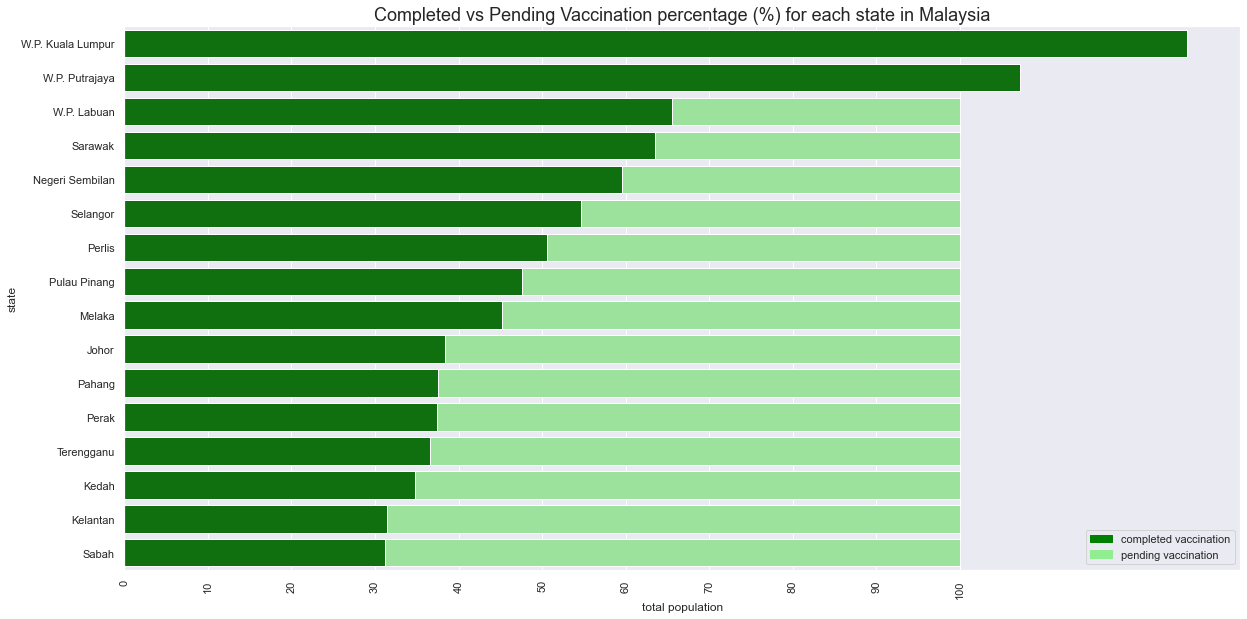

In [32]:
data_Vaccine_State_Total_Pop['dose2_cumul_percentage'] = [i / j * 100 for i,j in zip(data_Vaccine_State_Total_Pop['cumul_full'], data_Vaccine_State_Total_Pop['pop'])]
data_Vaccine_State_Total_Pop['total_population_percentage'] = [i / j * 100 for i,j in zip(data_Vaccine_State_Total_Pop['pop'], data_Vaccine_State_Total_Pop['pop'])]

plt.figure(figsize=(20, 10))
# sns.set_palette("Greens_r", n_colors=len(data_Vaccine_State_Total))
sns.barplot(data=data_Vaccine_State_Total_Pop, x='total_population_percentage', y='state', color='lightgreen')
sns.barplot(data=data_Vaccine_State_Total_Pop.sort_values('dose2_cumul_percentage', ascending=False), x='dose2_cumul_percentage', y='state', color='green')   #we use dose2_cumul a.k.a second dose cumulative is because we want to know who are completed vaccinated

#create legend
left_bar = mpatches.Patch(color='green', label='completed vaccination')
right_bar = mpatches.Patch(color='lightgreen', label='pending vaccination')
plt.legend(handles=[left_bar, right_bar])

plt.xticks(rotation=90)
plt.xticks(np.arange(0, 110, step=10))
plt.xlabel('total population')
plt.ylabel('state')
plt.title('Completed vs Pending Vaccination percentage (%) for each state in Malaysia', fontsize=18)
plt.show()

The result for some states, for example KL, the total number of people who are vaccinated might exceed the population due to the fact that some vaccine centres are opened for foreign workers. 

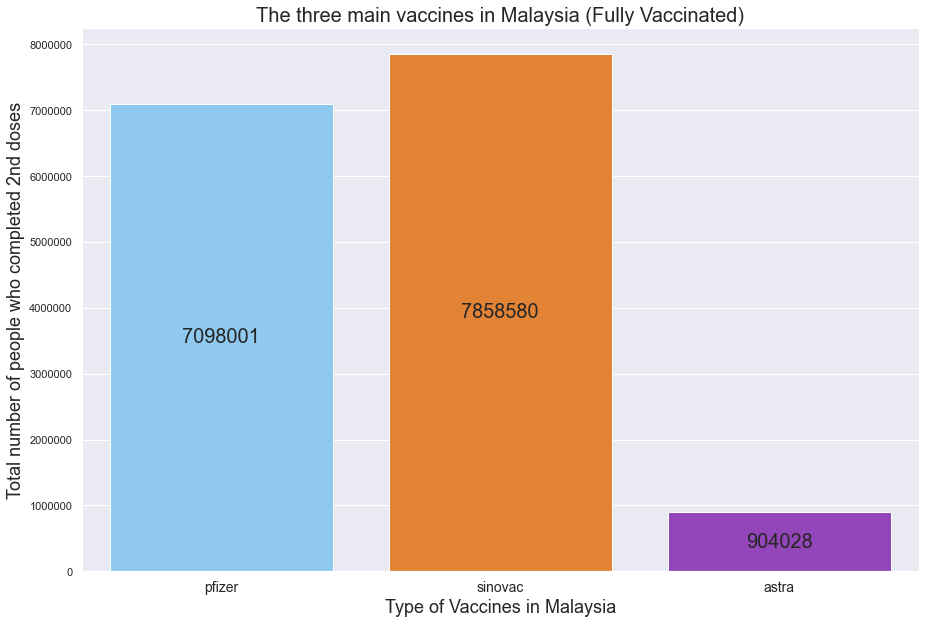

In [50]:
data_sum_vaccine = data_Vaccine_Malaysia[['pfizer2', 'sinovac2', 'astra2']].sum()
data_sum_vaccine_to_frame = pd.Series(data_sum_vaccine, name='Total').to_frame().rename_axis('Name').reset_index()
data_sum_vaccine_to_frame['Name'].replace({'pfizer2': 'pfizer', 'sinovac2': 'sinovac', 'astra2': 'astra'}, inplace=True)

sns.set(style="darkgrid")
plt.figure(figsize=(15, 10))
ax = plt.gca()
ax.get_yaxis().get_major_formatter().set_scientific(False)    #this is set the y-axis from exponential form to actual value form, example: 1e^6 to 1000000
sns.barplot(x='Name', y='Total', data = data_sum_vaccine_to_frame, palette=[(0.5, 0.8, 1), (1, 0.5, 0.1), (0.6, 0.2, 0.8)])  #use rgb (limited from 0 to 1) to fill color into each bar plot
ax.bar_label(ax.containers[0], label_type='center', labels=[data_sum_vaccine_to_frame.iloc[0,1], data_sum_vaccine_to_frame.iloc[1,1], data_sum_vaccine_to_frame.iloc[2,1]], size=20)
plt.xticks(fontsize=14)
plt.xlabel('Type of Vaccines in Malaysia', fontsize=18)
plt.ylabel('Total number of people who completed 2nd doses', fontsize=18)
plt.title('The three main vaccines in Malaysia (Fully Vaccinated)', fontsize=20)
plt.show()

### Positivity rate and death rate

In [34]:
data_test_Malaysia_Url = 'https://raw.githubusercontent.com/MoH-Malaysia/covid19-public/main/epidemic/tests_malaysia.csv'
data_deaths_Malaysia_Url = 'https://raw.githubusercontent.com/MoH-Malaysia/covid19-public/main/epidemic/deaths_malaysia.csv'
data_test_Malaysia = pd.read_csv(data_test_Malaysia_Url)
data_deaths_Malaysia = pd.read_csv(data_deaths_Malaysia_Url)
data_test_Malaysia.head()
data_deaths_Malaysia.head()

date  deaths_new  deaths_bid
0  2020-03-17           2         NaN
1  2020-03-18           0         NaN
2  2020-03-19           0         NaN
3  2020-03-20           1         NaN
4  2020-03-21           5         NaN

rtk-ag - The Antigen Rapid Test Kit (RTK-Ag) is also a common method used in Malaysia to determine if you have contracted the virus. This method detects viral protein related to the coronavirus to determine a reactive or non-reactive result.  As the name suggests, the rapid test is a faster method of detecting the virus in the body and can take as quickly as 15 minutes to acquire the results. Typically, the rapid test only requires a swab sample from the nose to yield results of reactive or non-reactive.

pcr - PCR stands for a polymerase chain reaction and is a method of examining the virus by detecting viral DNA. Compared to the Antigen Rapid Test Kit (RTK-Ag), the PCR examination is more accurate. This method is also recognised by the Ministry of Health (MOH) as the gold standard for COVID-19 diagnostic tests. However, this accuracy comes with a more complex process and higher equipment prices. In comparison, the PCR test also requires a much lengthier time to receive the results. This method also only determines if you have an active coronavirus infection and cannot determine if you have had the virus in the past.

In [35]:
data_test_Malaysia.info()
data_test_Malaysia.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 588 entries, 0 to 587
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   date    588 non-null    object
 1   rtk-ag  588 non-null    int64 
 2   pcr     588 non-null    int64 
dtypes: int64(2), object(1)
memory usage: 13.9+ KB


date      0
rtk-ag    0
pcr       0
dtype: int64

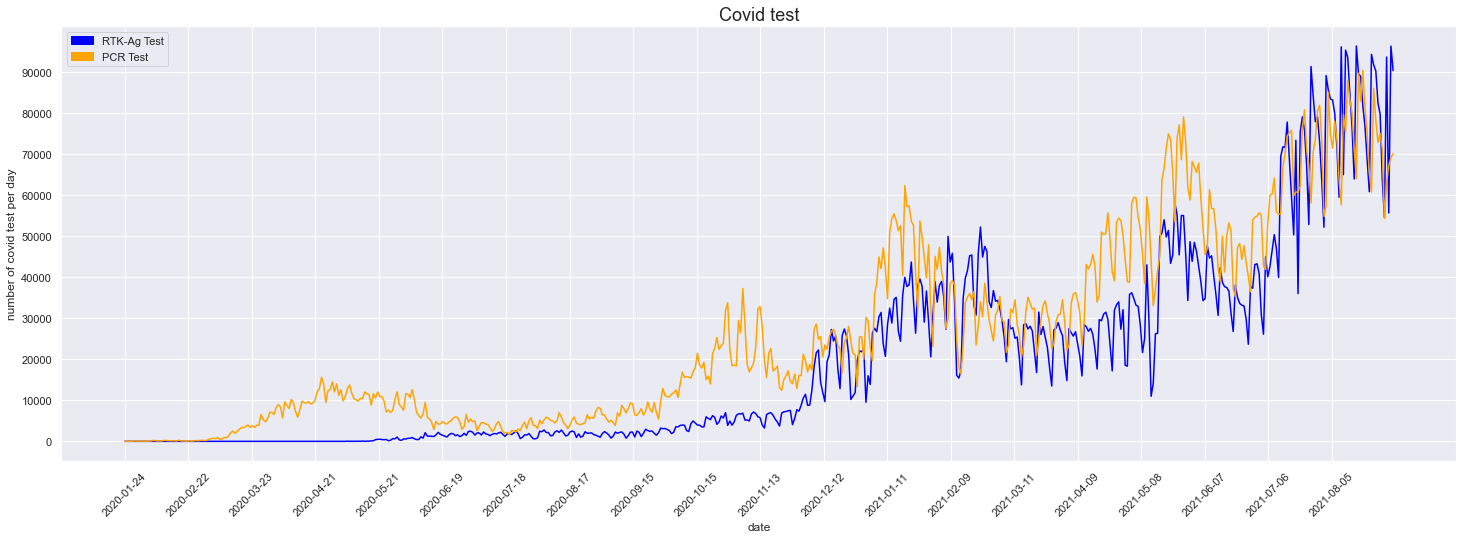

In [36]:
plt.figure(figsize=(25, 8))
sns.lineplot(data=data_test_Malaysia, x='date', y='rtk-ag', color='blue')  
sns.lineplot(data=data_test_Malaysia, x='date', y='pcr', color='orange') 

maximum_y = max(max(data_test_Malaysia['pcr']), max(data_test_Malaysia['rtk-ag']))  #to set maximum y axis

plt.xticks(np.arange(0, len(data_test_Malaysia), step=len(data_test_Malaysia) / 20), rotation=45)
plt.yticks(np.arange(0, maximum_y, step=10000))
plt.ticklabel_format(axis='y', scilimits=(0, maximum_y))  #this is set y scale from exponent value to actual value

#create legend
rtk_line = mpatches.Patch(color='blue', label='RTK-Ag Test')
pcr_line = mpatches.Patch(color='orange', label='PCR Test')
plt.legend(handles=[rtk_line, pcr_line])

plt.xlabel('date')
plt.ylabel('number of covid test per day')
plt.title('Covid test', fontsize=18)
plt.show()

It seems like more people will take PCR test at the beginning, but starting from july 2021, the number of covid test for these both type are nearly the same.

In [37]:
print(data_test_Malaysia.info())
print(data_Covid_Malaysia.info())

data_test_cases_death = pd.merge(data_test_Malaysia, data_Covid_Malaysia[['date', 'cases_new']], how='inner', on='date')

data_test_cases_death.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 588 entries, 0 to 587
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   date    588 non-null    object
 1   rtk-ag  588 non-null    int64 
 2   pcr     588 non-null    int64 
dtypes: int64(2), object(1)
memory usage: 13.9+ KB
None
<class 'pandas.core.frame.DataFrame'>
Int64Index: 589 entries, 1 to 589
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   date                     589 non-null    object 
 1   cases_new                589 non-null    int64  
 2   cases_import             589 non-null    int64  
 3   cases_recovered          589 non-null    int64  
 4   cluster_import           248 non-null    float64
 5   cluster_religious        248 non-null    float64
 6   cluster_community        248 non-null    float64
 7   cluster_highRisk         248 non-null    float64
 8   cluster_ed

date  rtk-ag  pcr  cases_new
0  2020-01-26       0   14          0
1  2020-01-27       0   24          0
2  2020-01-28       0   53          0
3  2020-01-29       0   71          3
4  2020-01-30       0   42          1

In [38]:
data_test_cases_death['total_test'] = data_test_cases_death['rtk-ag'] + data_test_cases_death['pcr']  #To get total test per day
data_test_cases_death['positivity_rate'] = round(data_test_cases_death['cases_new'] / data_test_cases_death['total_test'] * 100, 2)

column_names = ["date", "rtk-ag", "pcr", "total_test", "cases_new", "positivity_rate"]
data_test_cases_death = data_test_cases_death.reindex(columns=column_names)

print(data_test_cases_death.tail())
print(data_test_cases_death.info())

           date  rtk-ag    pcr  total_test  cases_new  positivity_rate
581  2021-08-29   54462  54230      108692      20579            18.93
582  2021-08-30   93514  62893      156407      19268            12.32
583  2021-08-31   55573  67125      122698      20897            17.03
584  2021-09-01   96183  69043      165226      18762            11.36
585  2021-09-02   90232  70035      160267      20988            13.10
<class 'pandas.core.frame.DataFrame'>
Int64Index: 586 entries, 0 to 585
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   date             586 non-null    object 
 1   rtk-ag           586 non-null    int64  
 2   pcr              586 non-null    int64  
 3   total_test       586 non-null    int64  
 4   cases_new        586 non-null    int64  
 5   positivity_rate  586 non-null    float64
dtypes: float64(1), int64(4), object(1)
memory usage: 32.0+ KB
None


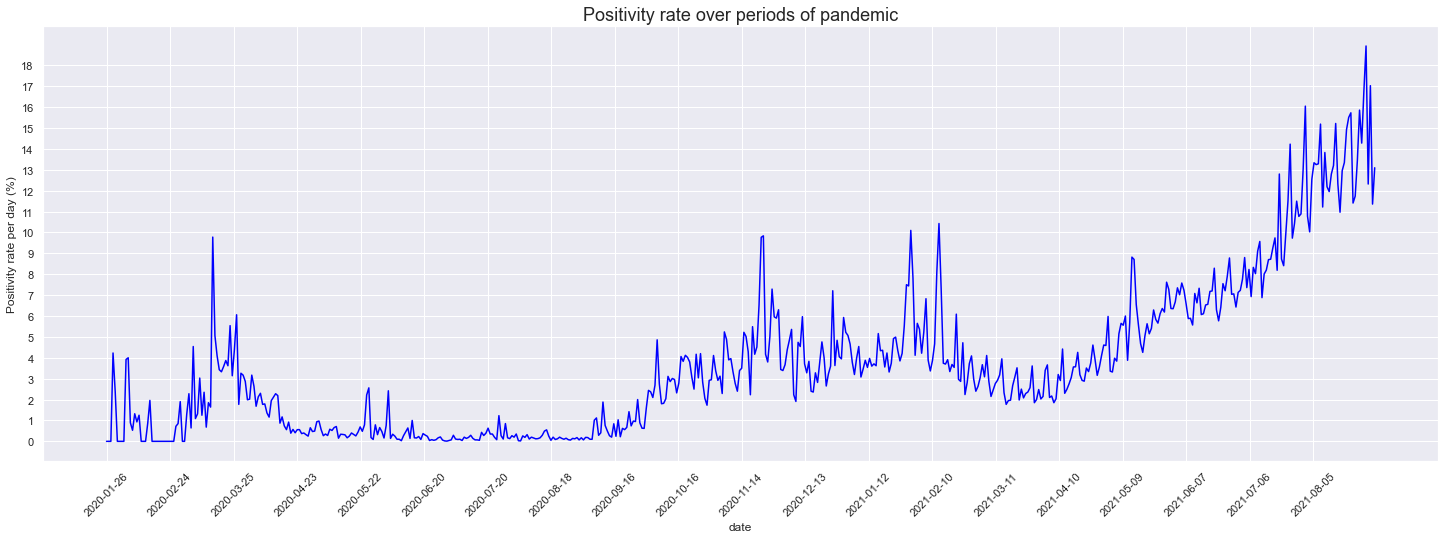

In [283]:
plt.figure(figsize=(25, 8))
sns.lineplot(data=data_test_cases_death, x='date', y='positivity_rate', color='blue')  
plt.xticks(np.arange(0, len(data_test_cases_death), step=len(data_test_cases_death) / 20), rotation=45)
plt.yticks(np.arange(0, max(data_test_cases_death['positivity_rate']), step=1))
plt.ticklabel_format(axis='y', scilimits=(0, max(data_test_cases_death['positivity_rate'])))  #this is set y scale from exponent value to actual value
plt.xlabel('date')
plt.ylabel('Positivity rate per day (%)')
plt.title('Positivity rate over periods of pandemic', fontsize=18)
plt.show()

## Cluster analysis 

#### These are Covid-19 clusters among states in Malaysia

In [52]:
data_Cluster_Url = 'https://raw.githubusercontent.com/MoH-Malaysia/covid19-public/main/epidemic/clusters.csv'
data_Cluster = pd.read_csv(data_Cluster_Url)[['district', 'category', 'cases_new', 'cases_total', 'status']]
data_Cluster.head()

district   category  cases_new  cases_total status
0  Lembah Pantai     import          0            3  ended
1       Pelbagai     import          0          144  ended
2       Pelbagai  religious          0         2022  ended
3       Pelbagai     import          0           24  ended
4        Kuantan  workplace          0           65  ended

In [41]:
data_Cluster.isnull().sum()

category       0
cases_new      0
cases_total    0
status         0
dtype: int64

There is no null value for this dataset

In [42]:
data_Cluster.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4854 entries, 0 to 4853
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   category     4854 non-null   object
 1   cases_new    4854 non-null   int64 
 2   cases_total  4854 non-null   int64 
 3   status       4854 non-null   object
dtypes: int64(2), object(2)
memory usage: 151.8+ KB


In [43]:
data_Cluster['category'].value_counts() 

workplace          2680
community          1372
highRisk            246
education           239
religious           160
detentionCentre     126
import               31
Name: category, dtype: int64

In [44]:
data_Cluster['status'].value_counts()   #ended means that a particular cluster has been ended, active means that a particular cluster has still ongoing

ended     3399
active    1455
Name: status, dtype: int64

In [45]:
data_Cluster['status_active'] = data_Cluster['status'].map(lambda x: 0 if x == 'ended' else 1)  #To map 'ended' to 0 and 'active' to 1
data_Cluster.head()

category  cases_new  cases_total status  status_active
0     import          0            3  ended              0
1     import          0          144  ended              0
2  religious          0         2022  ended              0
3     import          0           24  ended              0
4  workplace          0           65  ended              0

In [46]:
data_Cluster_sum = data_Cluster.groupby(by='category').sum().sort_values('cases_new', ascending=False).reset_index()

data_Cluster_sum['status_ended'] = list(data_Cluster['category'].value_counts()) - data_Cluster_sum['status_active']
data_Cluster_sum['status_total'] = list(data_Cluster['category'].value_counts())

data_Cluster_sum.head()

category  cases_new  cases_total  status_active  status_ended  \
0        workplace        886       271748            823          1857   
1        community        250        91390            485           887   
2        education        100        15230             24           222   
3  detentionCentre         54        39290             36           203   
4         highRisk          8        10904             75            85   

   status_total  
0          2680  
1          1372  
2           246  
3           239  
4           160

From above table, we can see that workplace is the main reason of Covid-19 Cluster

In [47]:
data_Cluster_sum['cases_total (%)'] = round(data_Cluster_sum['cases_total'] / data_Cluster_sum['cases_total'].sum() * 100, 2)

data_Cluster_sum['status_active_vs_cases_total_percentage'] = data_Cluster_sum['cases_total (%)'] * (data_Cluster_sum['status_active'] / data_Cluster_sum['status_total'])
data_Cluster_sum['status_ended_vs_cases_total_percentage'] = data_Cluster_sum['cases_total (%)'] * (data_Cluster_sum['status_ended'] / data_Cluster_sum['status_total'])

list_of_col_names = ['category', 'cases_new', 'cases_total', 'cases_total (%)', 'status_active', 'status_ended', 'status_total', 
                     'status_active_vs_cases_total_percentage', 'status_ended_vs_cases_total_percentage']
data_Cluster_sum = data_Cluster_sum.filter(items=list_of_col_names) #To rearrange the column order

data_Cluster_sum = data_Cluster_sum.sort_values('cases_total (%)', ascending=False)  
#sort the dataset in order to get the consistent column value for 'status_active_vs_cases_total_percentage' and 'status_ended_vs_cases_total_percentage' with 'cases_total (%)'
#because later on we will plot 2 pie plot, each pie plot has to be consistent with each other, so that 2 pie plot will fit exactly for each category 

data_Cluster_sum

category  cases_new  cases_total  cases_total (%)  status_active  \
0        workplace        886       271748            60.96            823   
1        community        250        91390            20.50            485   
3  detentionCentre         54        39290             8.81             36   
2        education        100        15230             3.42             24   
5        religious          4        15108             3.39             12   
4         highRisk          8        10904             2.45             75   
6           import          0         2113             0.47              0   

   status_ended  status_total  status_active_vs_cases_total_percentage  \
0          1857          2680                                18.720179   
1           887          1372                                 7.246720   
3           203           239                                 1.327029   
2           222           246                                 0.333659   
5           114           126                                 0.322857   
4            85           160                                 1.148438   
6            31            31                                 0.000000   

   status_ended_vs_cases_total_percentage  
0                               42.239821  
1                               13.253280  
3                                7.482971  
2                                3.086341  
5                                3.067143  
4                                1.301563  
6                                0.470000

[18.720179104477612, 42.23982089552239, 7.246720116618076, 13.253279883381923, 1.327029288702929, 7.482970711297072, 0.3336585365853659, 3.0863414634146342, 0.32285714285714284, 3.067142857142857, 1.1484375, 1.3015625000000002, 0.0, 0.47]


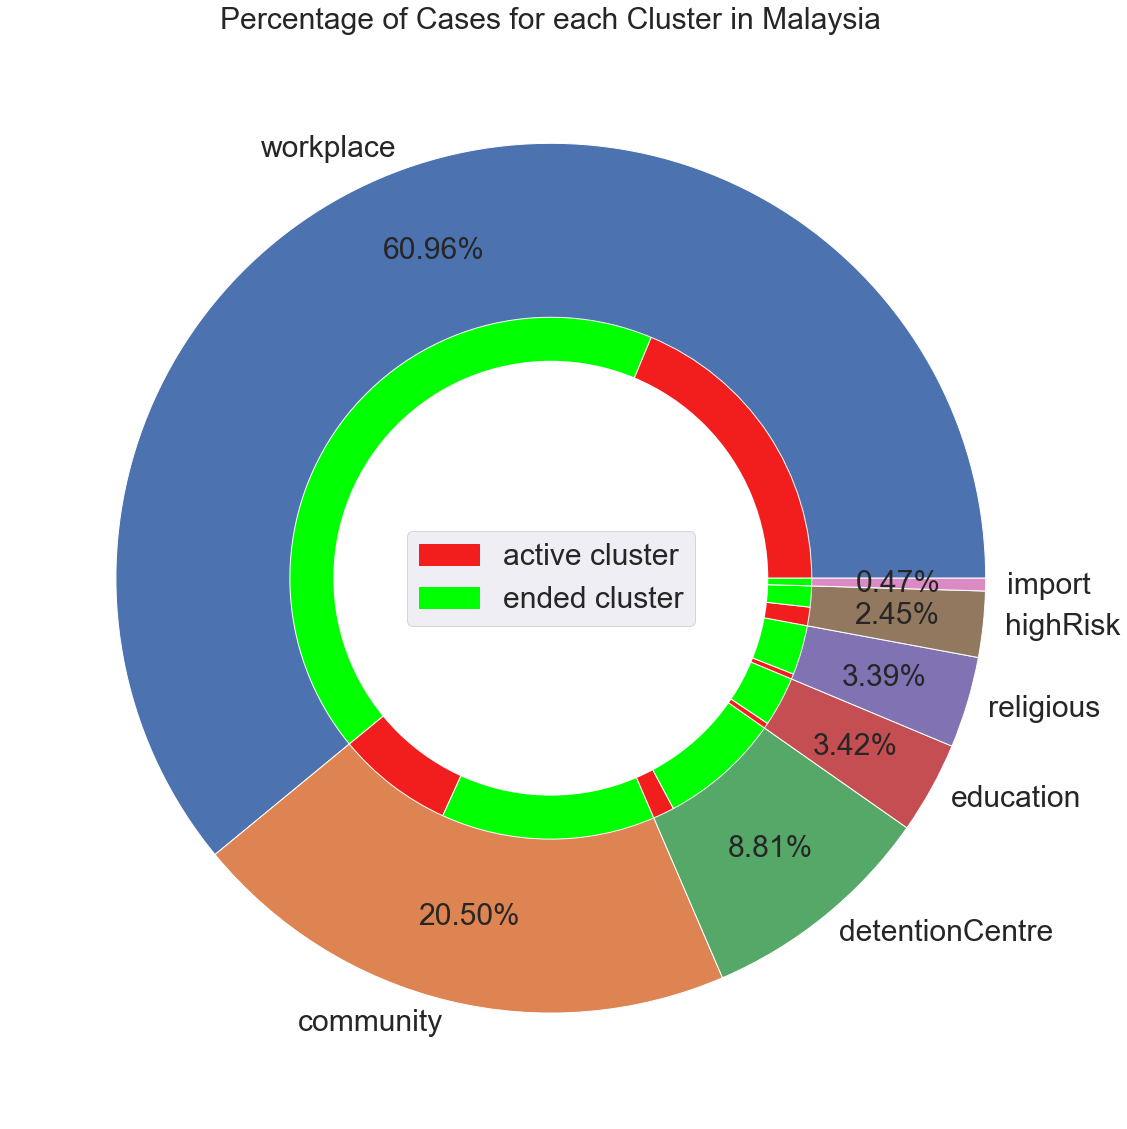

In [282]:
#Now drawing a pie chart

plt.figure(figsize=(20,20))
plt.rcParams['font.size'] = 30.0

#explode = (0.01,0.01,0.01,0.01,0.01,0.01,0.01) 
# explode_status = (0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1)

sizes_status = tuple(zip(data_Cluster_sum['status_active_vs_cases_total_percentage'] , data_Cluster_sum['status_ended_vs_cases_total_percentage']))

sizes_status_list = []
for countX, valueX in enumerate(sizes_status):
    for countY, valueY in enumerate(valueX):
        sizes_status_list.append(sizes_status[countX][countY])

print(sizes_status_list)

colors_status = ['#F21E1E','#00FF00', '#F21E1E','#00FF00', '#F21E1E','#00FF00', '#F21E1E','#00FF00', '#F21E1E','#00FF00', '#F21E1E','#00FF00']
                 
patches, texts, autotexts = plt.pie(data_Cluster_sum['cases_total (%)'], 
                                    labels = data_Cluster_sum['category'], 
                                    autopct=lambda x: '{:.2f}%'.format(x*data_Cluster_sum['cases_total (%)'].sum()/100), 
                                    pctdistance=0.8, 
                                    labeldistance=1.05,
                                    radius=1
#                                     colors = ['#F00505', '#F21E1E', '#F33737', '#F55050', '#F66969', '#F88282', '#F99B9B']
                                    )  # first big circle

plt.pie(sizes_status_list,colors=colors_status,startangle=0,radius=0.6)   # second small circle

#To make a donut circle
centre_circle = plt.Circle((0,0),0.5,fc='white', color='black', linewidth=0)
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
fig.gca()

#create legend
active_circle_part = mpatches.Patch(color='#F21E1E', label='active cluster')
ended_circle_part = mpatches.Patch(color='#00FF00', label='ended cluster')
plt.legend(handles=[active_circle_part, ended_circle_part], loc="center", prop={'size': 30})

[ text.set_fontsize(30) for text in texts ]  #list comprehension, set every label font to desired size
plt.title('Percentage of Cases for each Cluster in Malaysia', fontsize = 30)
plt.show()

#### Creating Malaysia's districts Word Cloud

In [225]:
print("Total unique district found in Malysia (has not been done feature engineering): " + str(len(data_Cluster['district'].unique())) + '\n')
print("Get top 10 rows: ")
print(data_Cluster['district'].head(10))
print('\n')
print("Get last 3 rows: ")
print(data_Cluster['district'].tail(3))

Total unique district found in Malysia (have not been done feature engineering): 1564

Get top 10 rows: 
0                  Lembah Pantai
1                       Pelbagai
2                       Pelbagai
3                       Pelbagai
4                        Kuantan
5                        Kuching
6                       Pelbagai
7    Kuching, Samarahan & Serian
8                         Kluang
9                  Lembah Pantai
Name: district, dtype: object


Get last 3 rows: 
4851      Kuala Terengganu
4852    Machang, Pasir Mas
4853             Pasir Mas
Name: district, dtype: object


Initially we see that there are 1564 unique of districts in Malaysia, but there are also some districts that are combined together, for example: 'Kuching, Samarahan & Serian' and also 'Machang, Pasir Mas', so in order to take true unique districts out, we need to perform spliting operation.

In [323]:
districts = list(data_Cluster['district'])

districts_split = []
districts_split_string = []

districts_split.append([str(re.split(',|&', word)[0]) for word in districts])  
#To split the words to word, for example, from 'Kuching, Samarahan & Serian' to [Kuching, Samarahan, Serian], initially there are one element, then we make it three

districts_split = districts_split[0]  #unlist it, initially [[...]], then we change to [...]

[districts_split_string.append(value.strip()) for value in districts_split]     #clear those empty space, example: change from 'Tumpat ' to 'Tumpat' to avoid word cloud take duplicate values
    
print("We can see that there are ", len(set(districts_split_string)), " unique districts where covid clusters has taken place on", '\n')  #set funtion is used to generate unique value only, de-duplication
print("All Districts: ", set(districts_split_string))  #show all unique districts (listed in no particular order)

districts_split_string_text = ' '.join(districts_split_string) #To make it a text
districts_split_string_text

We can see that there are  171  unique districts where covid clusters has taken place on 

All Districts:  {'Kuala Krai', 'Cameron Highland', 'Johor  Bahru', 'Julan', 'Limbang', 'Tumpat', 'Kulai', 'Julau', 'Jempol', 'Beaufort', 'Miri', 'Gombok', 'Bachok', 'Manjung', 'Tenom', 'Marudi', 'Seberang Perai Utara', 'Hulu langat', 'Jerantut', 'Rembau', 'Kepong', 'Beluru', 'Pitas', 'Meradong', 'Kalabakan', 'Segamat', 'Besut', 'Kota Bahru', 'Gombak', 'Titiwangsa', 'Kinabatangan', 'Telang Usan', 'Saratok', 'Petaling Jaya', 'Semporna', 'Beluran', 'Kampar', 'Kinta', 'Labuan', 'Sarikei', 'Serian', 'Bandar Baharu', 'Batang Padang', 'Bintulu', 'Baling', 'Kuala Nerus', 'Tangkak', 'Ranau', 'Papar', 'Pekan', 'Cheras', 'Pusa', 'Tanah Merah', 'Kuantan', 'Pontian', 'Pasir Mas', 'Rompin', 'Mukah', 'Nabawan', 'Kunak', 'Larut', 'Sri Aman', 'Kabong', 'Simunjan', 'Yan', 'Bau', 'Lembah Pantai', 'Kota Setar', 'Raub', 'Bagan Datuk', 'Kuching', 'Petaling', 'Kerian', 'Belaga', 'Petalng', 'Seremban', 'lembah Pantai', 

'Lembah Pantai Pelbagai Pelbagai Pelbagai Kuantan Kuching Pelbagai Kuching Kluang Lembah Pantai Rembau Jasin Hulu Langat Jerantut Seberang Perai Tengah Tumpat Seremban Johor Bahru Titiwangsa Johor Bahru Klang Muar Pelbagai Lembah Pantai Kepong Pelbagai Lembah Pantai Tawau Pekan Gombak Kuching Kota Kinabalu Putrajaya Hulu Langat Kota Tinggi Kepong Titiwangsa Gombak Titiwangsa Alor Gajah Temerloh Titiwangsa Kuching Kepong Petaling Hulu Langat Kepong Bentong Kota Kinabalu Alor Gajah Cheras Hulu Langat Cheras Hulu Langat Lembah Pantai Sepang Kuala Langat Putrajaya Maran Bera Maran Cheras Titiwangsa Gombak Kuala Selangor Kota Kinabalu Kuching Bintulu Sepang Hulu Langat Lembah Pantai Kuching Kuching Alor Gajah Kuching Bintulu Kuching Lembah Pantai Kemaman Kuching Lembah Pantai Kuching Sepang Kluang Kuching Klang Titiwangsa Kuching Petaling Kuantan Johor Bahru Kubang Pasu Kuching Sepang Kinta Baling Kuala Muda Yan Bintulu Titiwangsa Klang Kota Setar Sepang Lahad Datu Hulu Langat Kota Setar Ku

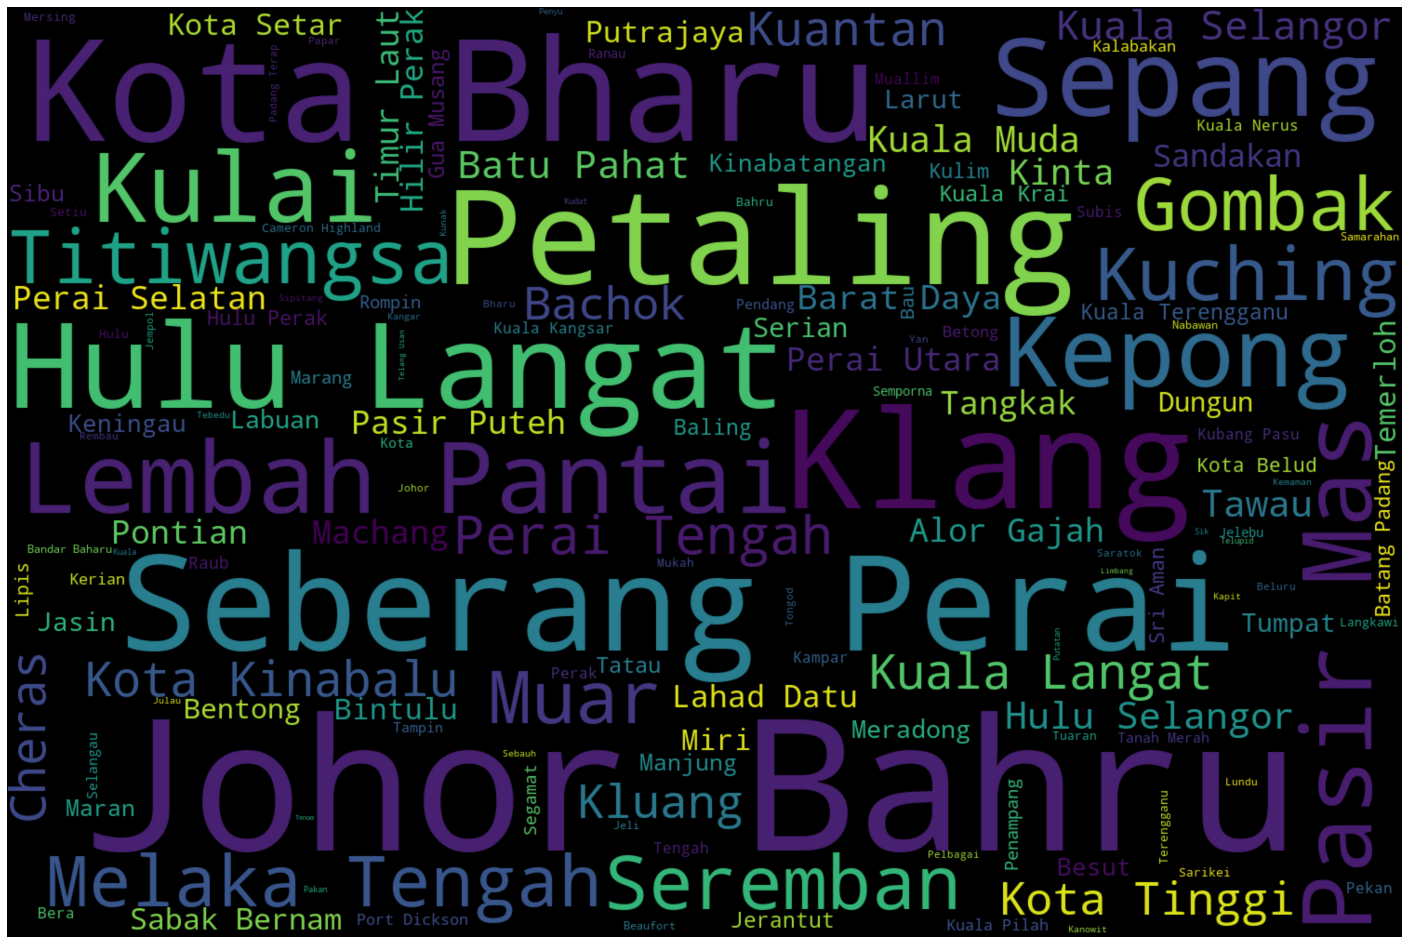

In [350]:
#creating word cloud
# font_path = r'C:\Users\user\AppData\Local\Programs\Python\Python39\Scripts\Covid 19 Malaysia\batmfa__.ttf'  #change font type

wc = WordCloud(width=1500, 
               height=1000,
               random_state=42,
               max_words=150,  
               background_color="black")   #actually we can choose any random state number we want, just that we want to keep it this way no matter how many times we excute this program
wc.generate(districts_split_string_text)
plt.figure(figsize=(25,25))
plt.imshow(wc, interpolation="gaussian")
plt.axis('off')
plt.show()

The above image consists of hundreds of districts of covid-19 clusters, the bigger and border the word appears on which more frequent the clusters are.

# Reference

- https://giuniquecom/codeforamerica/click_that_hood/blob/master/public/data/malaysia.geojson
- https://github.com/MoH-Malaysia/covid19-public